# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
#files.upload()

In [4]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
os.chdir('/gdrive/MyDrive/Colab Notebooks')

In [6]:
prices = pd.read_csv("prices.csv")

In [7]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [8]:
prices.shape

(851264, 7)

## Question 2

### Drop null
- Drop null values if any

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [10]:
prices.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,7.083699e+01,8.369588e+01,0.85,3.384000e+01,5.277000e+01,7.988000e+01,1.584440e+03
close,851264.0,7.085711e+01,8.368969e+01,0.86,3.385000e+01,5.280000e+01,7.989000e+01,1.578130e+03
low,851264.0,7.011841e+01,8.287729e+01,0.83,3.348000e+01,5.223000e+01,7.911000e+01,1.549940e+03
high,851264.0,7.154348e+01,8.446550e+01,0.88,3.419000e+01,5.331000e+01,8.061000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [11]:
prices.isnull().any().sum()

0

In [12]:
prices.isna().any().sum()

0

No Null values present in the data hence not required to drop any data

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [13]:
prices.drop({'date','symbol','volume'}, axis =1, inplace = True)

In [14]:
prices.shape

(851264, 4)

## Question 3

### Print the dataframe
- print the modified dataframe

In [15]:
prices.sample(10)

,open,close,low,high
262394,17.010000,16.820000,16.820000,17.070000
104446,73.250000,73.190002,72.750000,73.449997
374231,103.169998,105.559998,102.500000,105.660004
740564,38.250000,41.060001,37.590000,41.970001
6243,61.540001,60.570000,60.279999,62.119999
422847,24.610001,24.690001,24.520000,24.690001
395723,21.590000,22.660000,21.490000,22.820000
98429,63.880001,63.689999,63.310001,64.089996
92518,35.090000,35.320000,35.020000,35.619999
259185,27.049998,26.739998,26.620003,27.109995


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [16]:
X= prices.drop('close', axis = 1) #independent features
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [17]:
y= prices['close'] #target feature
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [18]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size = 0.3, random_state = 85)

In [19]:
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)
print('X test shape:', X_test.shape)
print('y test shape:', y_test.shape)

X train shape: (595884, 3)
y train shape: (595884,)
X test shape: (255380, 3)
y test shape: (255380,)


## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

In [22]:
scaledX_train

array([[ 0.0385793 ,  0.03265052,  0.04765766],
       [ 0.37150912,  0.37228696,  0.36875515],
       [-0.36340625, -0.36740602, -0.36835551],
       ...,
       [-0.5087109 , -0.50580332, -0.50651177],
       [ 0.50854147,  0.51964433,  0.50441675],
       [-0.49996043, -0.49720785, -0.50199899]])

In [23]:
scaledX_test

array([[ 2.11744274,  2.124956  ,  2.0945799 ],
       [ 1.9010443 ,  1.92383797,  1.91805348],
       [-0.27133202, -0.27162976, -0.27676611],
       ...,
       [ 0.15583006,  0.14779999,  0.15183909],
       [-0.21234699, -0.20890903, -0.21594406],
       [-0.22937111, -0.22319676, -0.21297423]])

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [24]:
print (type(scaledX_train))
print (type(scaledX_test))
print (type(y_train))
print (type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [25]:
y_train = np.array(y_train)
y_test = np.array(y_test)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [27]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1,activation = 'linear'))

#model = Sequential(Flatten(), Dense(1,activation = 'linear')) # Alternate

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [28]:
model.compile(optimizer='sgd', loss = 'mean_squared_error')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [29]:
model.fit(x = scaledX_train, y = y_train, batch_size=128, epochs = 50, validation_data = (scaledX_test, y_test))

Epoch 1/50
4656/4656 [==============================] - 9s 2ms/step - loss: 249.8832 - val_loss: 0.9637
Epoch 2/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9766 - val_loss: 0.9534
Epoch 3/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9905 - val_loss: 0.9435
Epoch 4/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9489 - val_loss: 0.9394
Epoch 5/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9469 - val_loss: 0.9462
Epoch 6/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9545 - val_loss: 0.9250
Epoch 7/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9467 - val_loss: 0.9178
Epoch 8/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9303 - val_loss: 0.9084
Epoch 9/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9365 - val_loss: 0.9290
Epoch 10/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [31]:
scores = model.evaluate(scaledX_test, y_test, verbose =0)


In [39]:
print("Accuracy:%.2f" %(scores*100))

Accuracy:70.22


### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [40]:
open = 123.430000
low =  122.30999
high = 116.250000

In [41]:
model.predict(sc.transform([[open,low,high]]))

array([[119.81947]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense ,Input

In [43]:
(trainX,trainY),(testX,testY) = tf.keras.datasets.fashion_mnist.load_data()
testY_O = testY

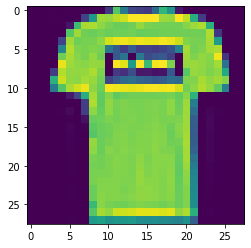

In [44]:
plt.imshow(trainX[1])

In [45]:
print('X train shape:',trainX.shape)
print('X test shape:',testX.shape)
print('y train shape:',trainY.shape)
print('y test shape:',testY.shape)

X train shape: (60000, 28, 28)
X test shape: (10000, 28, 28)
y train shape: (60000,)
y test shape: (10000,)


### Change train and test labels into one-hot vectors

In [46]:
testY

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [47]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [48]:
testY = tf.keras.utils.to_categorical(testY)

In [49]:
testY

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
trainY = tf.keras.utils.to_categorical(trainY)

In [51]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [52]:
model_1 = Sequential()
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
model_1.add(tf.keras.layers.BatchNormalization())

In [53]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
Total params: 3,136
Trainable params: 1,568
Non-trainable params: 1,568
_________________________________________________________________


### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [54]:
model_1.add(Dense(200, activation='relu'))
model_1.add(Dense(100, activation='relu')) 
model_1.add(layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [55]:
model_1.add(Dense(10,activation='softmax'))

In [56]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 2, monitor ='val_loss')

In [57]:
model_1.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

### Print model summary

In [58]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
____________________________________________

###Train your model, use test data as validation set

In [60]:
history = model_1.fit(trainX,trainY,validation_data=(testX,testY),epochs=20,batch_size=32,callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6282 - accuracy: 0.7767 - val_loss: 0.4211 - val_accuracy: 0.8438
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4013 - accuracy: 0.8525 - val_loss: 0.3942 - val_accuracy: 0.8586
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3598 - accuracy: 0.8663 - val_loss: 0.3685 - val_accuracy: 0.8661
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.8751 - val_loss: 0.3499 - val_accuracy: 0.8759
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.8842 - val_loss: 0.3623 - val_accuracy: 0.8721
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.8871 - val_loss: 0.3479 - val_accuracy: 0.8789
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2827 - accuracy: 0.8942 - val_loss: 0.3593 - val_accuracy:

###Predict Labels

In [61]:
model_1.predict(testX)

array([[1.9291597e-09, 5.6044973e-12, 1.3275754e-10, ..., 7.8942431e-03,
        1.9346869e-09, 9.9164647e-01],
       [8.1147050e-07, 9.8872065e-17, 9.9964345e-01, ..., 5.0230381e-22,
        1.0895003e-13, 2.3210049e-24],
       [7.8862253e-21, 1.0000000e+00, 4.6197559e-23, ..., 7.5065146e-35,
        8.8109467e-30, 1.8040368e-30],
       ...,
       [6.5704002e-09, 3.0411424e-12, 2.1852658e-08, ..., 6.0844020e-15,
        9.9999952e-01, 4.2061554e-16],
       [2.2174260e-18, 1.0000000e+00, 1.6081259e-18, ..., 1.5811103e-20,
        6.1391019e-22, 1.2053492e-19],
       [2.5601886e-07, 3.2054573e-10, 2.7278963e-07, ..., 2.0222904e-02,
        2.1417011e-06, 9.4230854e-05]], dtype=float32)

In [62]:
y_pred = np.argmax(model_1.predict(testX), axis=-1)

In [63]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

###Print Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY_O,y_pred)

array([[871,   3,  17,  36,   4,   0,  64,   1,   3,   1],
       [  0, 973,   1,  20,   1,   0,   5,   0,   0,   0],
       [ 18,   0, 777,  15, 118,   1,  71,   0,   0,   0],
       [ 17,   8,   6, 930,  21,   0,  14,   0,   4,   0],
       [  0,   1,  69,  44, 821,   0,  64,   0,   1,   0],
       [  0,   0,   0,   0,   0, 958,   0,  26,   0,  16],
       [139,   2,  74,  42,  63,   0, 672,   0,   8,   0],
       [  0,   0,   0,   0,   0,  17,   0, 951,   0,  32],
       [  7,   0,  12,   6,   6,   3,  14,   4, 948,   0],
       [  1,   0,   0,   0,   0,  11,   2,  31,   0, 955]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

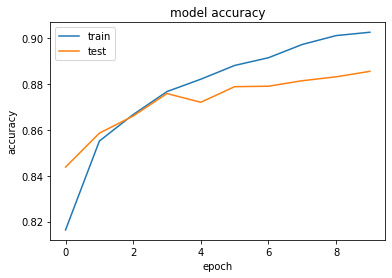

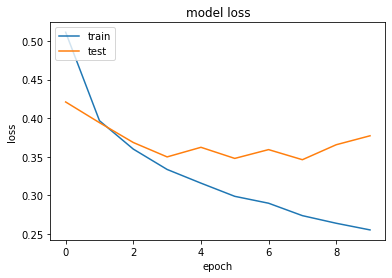

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
